# Assignment 2

## Part 1

In [1]:
%load_ext autoreload
%autoreload

In [2]:
import gym
import numpy as np
from control_algos import *
import matplotlib.pyplot as plt
from tqdm import tqdm

We can set up the environment and set the experiment parameters.

In [3]:
env = gym.make("Taxi-v2")

num_runs = 10
num_segments = 100
num_episodes = 10

Define a function to run our experiments...

In [4]:
def run_experiment(num_runs, num_segments,num_episodes,env, controller, learning_rate, temp):
    # Hard coding discount factor for experiment
    algorithm = controller(1,env.observation_space.n, env.action_space.n,  temp, learning_rate)
    train_returns = np.zeros(shape=(num_runs,num_segments,num_episodes))
    test_returns = np.zeros(shape=(num_runs,num_segments))
    for run in range(num_runs):
        for segment in tqdm(range(num_segments)):
            for training_episode in range(num_episodes):
                # Sample S,A to start episode
                s = env.reset()
                a = algorithm.sample_action(s)
                done = False
                while not done:
                    observation, reward, done, _ = env.step(a)
                    next_a = algorithm.sample_action(s) 
                    algorithm.backup_state_action_values(s,a, reward, observation, next_a) 
                    train_returns[run,segment,training_episode] += reward
                    s, a = observation, next_a
            # Run a test episode
            s = env.reset()
            a = algorithm.optimal_policy(s)
            done = False
            while not done:
                observation, reward, done, _ = env.step(a)
                next_a = algorithm.optimal_policy(s)
                test_returns[run,segment] += reward           
                s, a = observation, next_a
    return train_returns, test_returns

### Hyper-parameter initialization

In [5]:
lr = [0.1,0.5,0.9]
temperatures = [0.1,0.5,1]
algos = [Sarsa, QLearning, ExpectedSarsa]

params = [(a,l,t) for l in lr for t in temperatures for a in algos]

###  Run experiments and store results

In [7]:
train_results_dict = {}
test_results_dict = {}
for p in params:
    train_results, test_results = run_experiment(num_runs, num_segments, num_episodes,env,*p)
    train_results_dict[p], test_results_dict[p] = train_results, test_results

100%|██████████| 100/100 [00:04<00:00, 21.19it/s]


### Plot figures from training

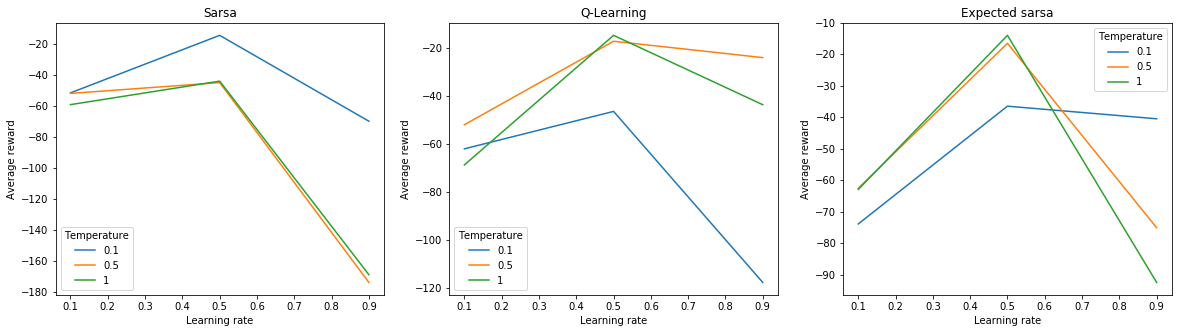

In [8]:
title_map = {0:'Sarsa', 1: 'Q-Learning', 2:'Expected sarsa'}
fig, axes  = plt.subplots(1,3,figsize=(20,5))
for i in range(len(algos)):
    ax = axes[i]
    for t in temperatures:
        ax.set_title(title_map[i])
        ax.plot(lr, [train_results_dict[(algos[i],x,t)][:,-1,:].mean() for x in lr])
        ax.legend([0.1,0.5,1], title='Temperature')
        ax.set_xlabel('Learning rate')
        ax.set_ylabel('Average reward')

### Plot figures from testing

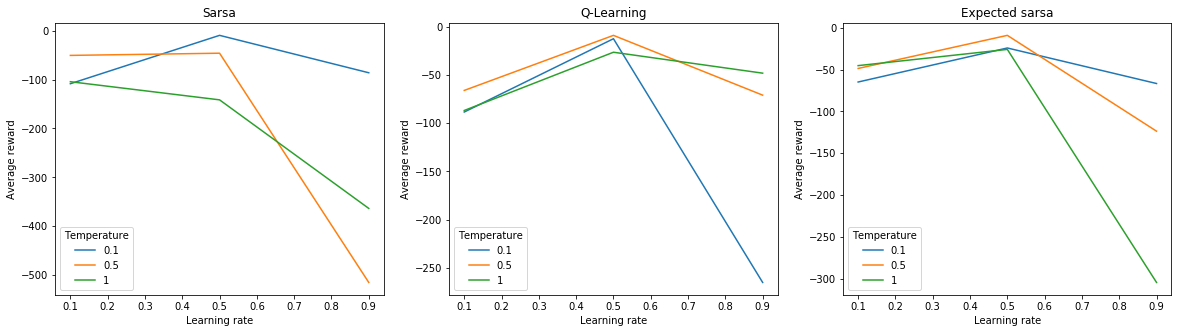

In [9]:
fig, axes  = plt.subplots(1,3,figsize=(20,5))
for i in range(len(algos)):
    ax = axes[i]
    for t in temperatures:
        ax.set_title(title_map[i])
        ax.plot(lr, [test_results_dict[(algos[i],x,t)][:,-1].mean() for x in lr])
        ax.legend([0.1,0.5,1], title='Temperature')
        ax.set_xlabel('Learning rate')
        ax.set_ylabel('Average reward')

### Learning Curves for best parameters


In [37]:
qlearn_mean = train_results_dict[(QLearning, 0.5,1)].mean(2).mean(0)
sarsa_mean = train_results_dict[(Sarsa, 0.5,0.1)].mean(2).mean(0)
expsarsa_mean = train_results_dict[(ExpectedSarsa, 0.5,1)].mean(2).mean(0)
qlearn_std = train_results_dict[(QLearning, 0.5,1)].mean(2).std(0)
sarsa_std = train_results_dict[(Sarsa, 0.5,0.1)].mean(2).std(0)
expsarsa_std = train_results_dict[(ExpectedSarsa, 0.5,1)].mean(2).std(0)

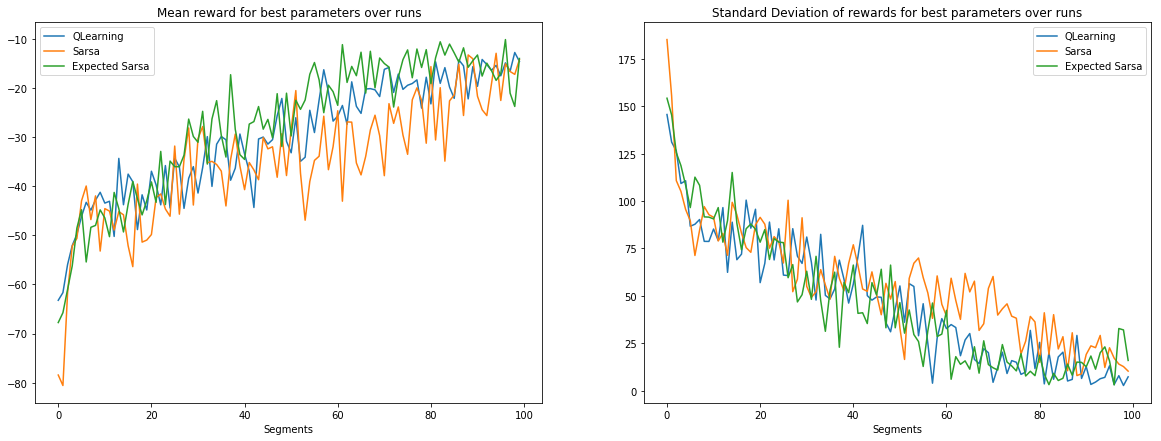

In [55]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].set_xlabel('Segments')
ax[0].set_title('Mean reward for best parameters over runs')
ax[0].plot(qlearn_mean)
ax[0].plot(sarsa_mean)
ax[0].plot(expsarsa_mean)
ax[0].legend(['QLearning', 'Sarsa', 'Expected Sarsa'])
ax[1].set_title('Standard Deviation of rewards for best parameters over runs')
ax[1].set_xlabel('Segments')
ax[1].plot(qlearn_std)
ax[1].plot(sarsa_std)
ax[1].plot(expsarsa_std)
ax[1].legend(['QLearning', 'Sarsa', 'Expected Sarsa'])

## Part 2

In [19]:
from function_approximation import *
env = gym.make("Pendulum-v0")
lambd = 0.3
learning_rate = 0.9

In [160]:
pendulum_algo = PendulumTD(num_bins=10, x_low=-np.pi, x_high=np.pi, y_low=0., y_high=8.,
                               discount=0.9, decay=lambd,
                               learning_rate=learning_rate,
                               num_tilings=5, seed=0)
run(num_episodes=200,pendulum_algo=pendulum_algo,env=env)

100%|██████████| 200/200 [00:06<00:00, 29.34it/s]


-49.99734269034015

In [158]:
run(1, pendulum_algo,env)

100%|██████████| 1/1 [00:00<00:00, 19.92it/s]


-88.65901782875856